# 447 23fa exam 1 solution

***Notes regarding regrade requests:***

* ***I will accept regrade requests from Wed Nov 15 to Wed Nov 22*** -- this will give you time to review your exam and the solutions before requesting a regrade.
* To request a regrade, send me a message using Canvas Conversations with a short explanation of which problem(s) you want regarded, and why you think your solution is equivalent to or equally valid as the one provided.
* Please consolidate all your requests into one message.
* ***Note that it is possible your score will decrease after the regrade***, so please be sure you understand the problem and solution before making a request.  To help you understand the problems and their solutions before you submit your request, I am happy to answer questions during office hours.

In [2]:
from _447 import *

10.0 <= scores <= 21.0
median score = 18.5


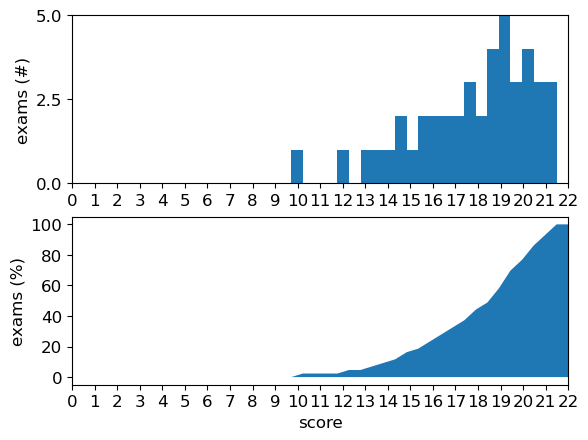

In [2]:
scores = np.array([10.  , 12.  , 13.  , 13.75, 14.  , 14.5 , 14.5 , 15.  , 15.5 ,
       15.5 , 16.  , 16.  , 16.5 , 16.5 , 17.  , 17.  , 17.5 , 17.5 ,
       17.5 , 18.  , 18.  , 18.5 , 18.5 , 18.5 , 18.5 , 19.  , 19.  ,
       19.  , 19.  , 19.  , 19.5 , 19.5 , 19.5 , 20.  , 20.  , 20.  ,
       20.25, 20.5 , 20.5 , 20.5 , 21.  , 21.  , 21.  ])
print('%0.1f <= scores <= %0.1f'%(scores.min(),scores.max()))
print('median score = %0.1f'%np.median(scores))

xlim = (0,22)
dxlim = int(np.diff(xlim))

plt.figure()
plt.subplot(2,1,1)
h = plt.hist(scores,bins=np.linspace(xlim[0],xlim[1],2*dxlim))
n,s = h[0],h[1]
N = int(np.ceil(h[0].max()))
plt.ylim(0,N)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,N,(N+2)//2))
plt.xlim(xlim)
plt.ylabel('exams (#)');

plt.subplot(2,1,2)
n *= 100./n.sum()
n = np.hstack((0.,n))
plt.fill_between(s,np.cumsum(n),0*n)
plt.xlim(xlim)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,100,6))
plt.xlabel('score'); plt.ylabel('exams (%)');

# problem 1

Suppose you applied sinusoidal input to a physical system at a range of frequencies, measured the response, and visualized the result using the Bode plot below. Now you want to find a process model $P$ for the physical system. 

Determine parameters $a,b$ for first-order process model $P(s) = b / (s + a)$ that provide a good approximation of the empirical plot. Specify your model's parameters and overlay your model's Bode plot on the empirical Bode plot below; use a legend on the plot to clearly distinguish between data from your model and the data provided.

### solution

This is a curve-fitting problem -- you need to explore the space of parameters $(a,b)\in\mathbb{R}^2$ to find a "good enough" pair of parameters (this problem is more generally termed [system identification](https://en.wikipedia.org/wiki/System_identification)). It is possible to do this by hand using your knowledge of how the parameters shape the Bode plot. But it is also possible to systemetize this process using optimization principles; the solution below adopts the latter strategy. (Specifically, we use a gradient-based algorithm; the main alternative is sampling-based. If you're interested in learning more about both, I recommend [this paper](http://dx.doi.org/10.1073/pnas.1820003116).)

In [2]:
omega = np.logspace(-1,1,1000)
G_omega = np.loadtxt('447_23fa_exam1_data1.txt').view(complex)

# define a "loss" function that we seek to minimize
def loss(x):
    a,b = x
    P = lambda s : b / (s + a)
    P_omega = P(1j*omega)
    # compare closeness of data and model in the least-squares sense
    return np.sum( np.abs(G_omega - P_omega)**2 )

# initialize using the values from lecture -- pretty naive
a0 = 1; b0 = 1
x0 = (a0,b0)
opt = op.minimize(loss,x0)
a,b = opt.x

print('optimization succeeded?',opt.success)
print('optimal a = %0.2f, b = %0.1f' % (a,b))

optimization succeeded? True
optimal a = 3.14, b = 49.0


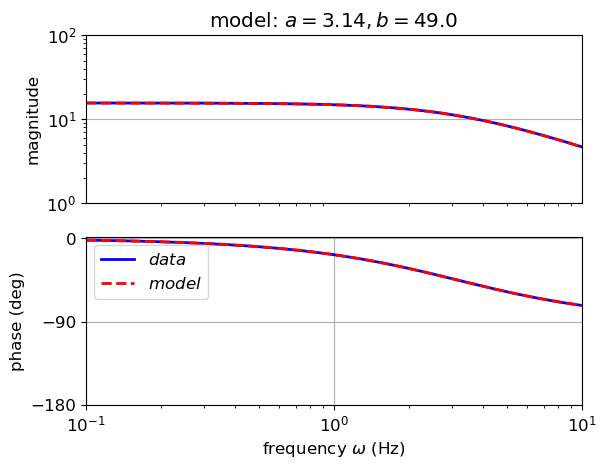

In [3]:
omega = np.logspace(-1,1,1000)
G_omega = np.loadtxt('447_23fa_exam1_data1.txt').view(complex)

P = lambda s : b / (s + a)
P_omega = P(1j*omega)

xlim = omega[[0,-1]]

abs_G = np.abs(G_omega)
angle_G = np.unwrap(np.angle(G_omega))*180./np.pi

abs_P = np.abs(P_omega)
angle_P = np.unwrap(np.angle(P_omega))*180./np.pi

plt.figure(); axs = []
ax = plt.subplot(2,1,1); ax.grid(True)
ax.set_title(r'model: $a = %0.2f, b = %0.1f$' % (a,b))
ax.loglog(omega,abs_G,'b-',lw=2)
ax.loglog(omega,abs_P,'r--',lw=2)
ax.set_ylabel(r'magnitude')
ax.set_yticks([10**0,10**+1,10**+2])
ax.set_xticks([])
ax.set_xlim(xlim)
axs.append(ax)

ax = plt.subplot(2,1,2); ax.grid(True)
ax.semilogx(omega,angle_G,'b-',lw=2,label=r'$data$')
ax.semilogx(omega,angle_P,'r--',lw=2,label=r'$model$')
ax.set_xlabel(r'frequency $\omega$ (Hz)')
ax.set_ylabel(r'phase (deg)')
ax.set_yticks([0,-90,-180])
ax.set_xlim(xlim)
ax.legend()
axs.append(ax)

# problem 2

The following graph shows the homogeneous response of a process $P$. Show that $P$ cannot be first-order.

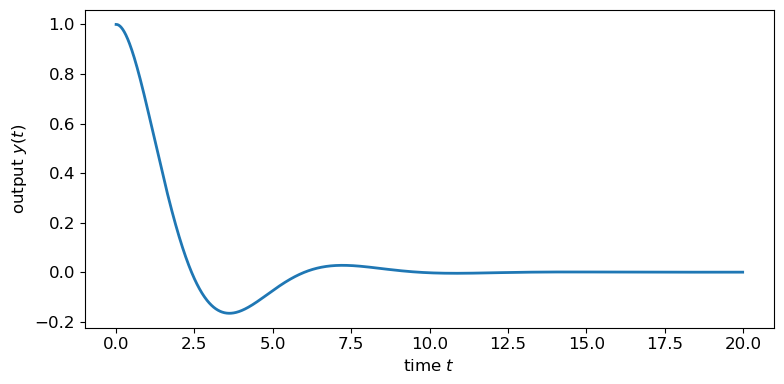

In [5]:
t,y = np.loadtxt('447_23fa_exam1_data2.txt')

fig = plt.figure(figsize=(8,4));

ax = plt.subplot(111)
ax.plot(t,y,lw=2)
ax.set_ylabel(r'output $y(t)$')
ax.set_xlabel('time $t$')

plt.tight_layout()

### solution

We know from lecture 1 that the homogeneous response of a process $P$ of order $n$ is given by a linear combination of exponentials $e^{s_k t}$ where $\{ s_k \}_{k=1}^n \subset \mathbb{C}$ are roots of $P$'s characteristic polynomial. When $n = 1$, there is only one root, so the root must be real (because roots with non-zero imaginary part come in complex conjugate pairs). But the function $e^{s t}$ where $s \in \mathbb{R}$ is monotonic, that is, it either increases or decreases but does not switch directions over time. Since the graph is not monotonic, $P$ cannot be first-order.

# problem 3

If the state-space system $\dot{x} = A x$ is stable, show that the eigenvalues of $e^{A}$ have magnitude smaller than 1.

### solution

Eigenvalues and eigenvectors of $A$ and $e^A$ are directly related: if $A v = \lambda v$ then $e^A v = e^\lambda v$; this fact can be verified directly with the power series definition of the matrix exponential from lecture 4, and it was proven in the solution to problem 4a in the 2020 exam 1.

We also know that, if $\dot{x} = A x$ is stable, then $\text{Re}(\lambda) < 0$ for all eigenvalues $\lambda$ of $A$. Since $| e^{\sigma + j\omega}| = e^\sigma$ for all $\sigma,\omega\in\mathbb{R}$, and $e^\sigma < 1$ when $\sigma < 0$, we conclude that all eigenvalues of $e^A$ have magnitude smaller than 1.

# problem 4

Consider the DE model of a series RLC circuit
$$ L \ddot{q} + R \dot{q} + q/C = u $$
where $q$ denotes the charge on the capacitor,
($R$, $L$, $C$) denote the (resistor, inductor, capacitor) parameters,
and $u$ denotes a series voltage source.

You are tasked with designing a proportional-integral-derivative (PID) controller to track reference voltage $r$ using the standard negative feedback control architecture (see lecture 1e). In terms of error $e = r - C q$, the controller $K$ you design is defined by
$$ u = k_P\, e + \frac{k_I}{s} e + k_D\, s\, e. $$

## subproblem 4a
Determine all the constraints the parameter vectors $k = (k_P, k_I, k_D) \in \mathbb{R}^3$ must satisfy to ensure the closed-loop system is stable.

### solution

We have multiple tools to assess stability of systems specified as a transfer function, $n$th-order differential equation, or state-space differential equation. But all the tools are based on the system's characteristic polynomial. So our first task is to obtain the characteristic polynomial for the closed-loop system.

*grading notes:*
* characteristic polynomial must be 3rd-order
* Routh-Hurwitz stability criteria for 3rd-order system must be applied
* points were not deducted for arithmetic errors in characteristic polynomial or Routh-Hurwitz criteria (including failing to divide by $a_0$)

One way to obtain the closed-loop system is to compose the process and controller transfer functions in the standard negative feedback loop.

In [48]:
R,L,C = sym.symbols(r'R,L,C')
kP,kI,kD = sym.symbols(r'k_P,k_I,k_D')
q,dq,ddq,r,s = sym.symbols(r'q,\dot{q},\ddot{q},r,s')

# process and controller transfer functions
P = C / (L * s**2 + R * s + 1/C)
U = kP + kI / s + kD * s

# closed-loop transfer function from r to C*q
T = sym.simplify(sym.expand(P*U / (1 + P*U)))
T

              2 ⎛     2              ⎞             
             C ⋅⎝k_D⋅s  + k_I + k_P⋅s⎠             
───────────────────────────────────────────────────
 2      2    2        2              3        2    
C ⋅k_D⋅s  + C ⋅k_I + C ⋅k_P⋅s + C⋅L⋅s  + C⋅R⋅s  + s

With the closed-loop transfer function in hand, we can apply the Routh-Hurwitz criteria to determine how stability depends on the controller parameters $k_P, k_I, k_D$. So we first extract the coefficients of each monomial ($s^k$ for $k$ from $0$ to $3$). The coefficients in the following array are indexed as in lecture 3c, with `a[1]` multiplying $s^2$, `a[2]` multiplying $s^1$, `a[3]` multiplying $s^0$.

In [49]:
a = [sym.denom(T).coeff(s,k) for k in range(3,-1,-1)]
a

⎡      2             2           2    ⎤
⎣C⋅L, C ⋅k_D + C⋅R, C ⋅k_P + 1, C ⋅k_I⎦

But Routh-Hurwitz only applies to polynomials where the coefficient on the highest-order term is 1, so we need to modify this list by dividing each term by `a[0]`.

In [50]:
[sym.simplify(a[k] / a[0]) for k in range(1,4)]

⎡            2               ⎤
⎢C⋅k_D + R  C ⋅k_P + 1  C⋅k_I⎥
⎢─────────, ──────────, ─────⎥
⎣    L         C⋅L        L  ⎦

Routh-Hurwitz stipulates that each of the entries in the preceding list are positive, so 
$$ k_D > -R/C,\ k_P > -1/C^2,\  k_I > 0$$
and that the product of the first two is larger than the third, so
$$ \frac{(C k_{D} + R)}{L} \frac{(C^2 k_{P} + 1)}{C L} > \frac{k_I}{L}. $$
These are the 4 constraints the controller parameters must satisfy to ensure the closed-loop system is stable.

## subproblem 4b
Determine a state-space model for the closed-loop system. Specify the state and input vectors.

### solution

It is important to realize that the inclusion of integral control increases the dimension of the closed-loop system state. This is apparent from the solution to the previous subproblem, as the closed-loop transfer function's characteristic polynomial is third-order, whereas the process is only second-order. But it can be seen directly from the definition of the controller, since we need to sum up the error over time to define the integral term -- the value of this integral cannot be determined solely from the value of $q$ and $\dot{q}$ at one point in time, so an additional state variable is needed to store and update that information.

One solution strategy is to transcribe the transfer function from the previous subproblem into a third-order differential equation as shown in lecture 1, then transcribe the third-order DE into state-space form as shown in lecture 2. Another strategy is to work directly in state space. We'll consider both strategies below.

*grading notes:*
* state vector dimension must be larger than 2
* dynamics must be correctly specified with respect to state vector

#### state-space strategy

We introduce an additional state variable $z$ with dynamics $\dot{z} = e = r - C q$; the quantity $z$ is the integral of the error used in the proposed controller. Choosing state vector $x = (z,q,\dot{q})$, we have
$$ \dot{x} = \left[ \begin{array}{c} \dot{z} \\ \dot{q} \\ \ddot{q} \end{array} \right] = \left[ \begin{array}{c} r - Cq \\ \dot{q} \\ (u - q/C - R\dot{q})/L\end{array} \right]. $$

But we can't stop here because $u$ is not an external input: it is actually a function of $q$, $\dot{q}$, and $z$ (corresponding to the proportional, derivative, and integral terms). In terms of the state vector $x = (z,q,\dot{q})$ we have
$$ u = k_P (r - C q) + k_I z + k_D (\dot{r} - C\dot{q}); $$

Substituting this expression for $u$ into the expression for $\dot{x}$ yields the answer,
$$ \dot{x} = \left[ \begin{array}{c} r - Cq \\ \dot{q} \\ \left(k_P (r - Cq) + k_I z + k_D (\dot{r} - C\dot{q}) - q/C - R\dot{q}\right)/L \end{array} \right] = f(x,w). $$

The state vector is $x = (q,\dot{q},z)\in\mathbb{R}^3$ as previously stated. As for the inputs, note that the reference $r$ and its derivative $\dot{r}$ appear in the expression for $\dot{x}$. Since these quantities can change in time but are not influenced by the other state variables, they are both inputs to the system. So the input vector is $w = (r,\dot{r})\in\mathbb{R}^2$.

In [51]:
z,dr = sym.symbols(r'z,\dot{r}')

x = sym.Matrix([z,q,dq])
w = sym.Matrix([r,dr])

ddq = (kP*(r - C*q) + kI*z + kD*(dr - C*dq) - q/C - R*dq)/L
dz = r - C*q

f = sym.Matrix([[dz],[dq],[ddq]])
f

⎡                              -C⋅q + r                              ⎤
⎢                                                                    ⎥
⎢                              \dot{q}                               ⎥
⎢                                                                    ⎥
⎢                                                                   q⎥
⎢-R⋅\dot{q} + k_D⋅(-C⋅\dot{q} + \dot{r}) + k_I⋅z + k_P⋅(-C⋅q + r) - ─⎥
⎢                                                                   C⎥
⎢────────────────────────────────────────────────────────────────────⎥
⎣                                 L                                  ⎦

This is a valid answer to the problem. But it is instructive to recognize this is a linear function and find matrices $A$, $B$ such that $f(x,w) \approx A x + B w$ where $w = (r,\dot{r})$.

In [52]:
A = sym.Matrix([[sym.diff(fi,xj) for xj in x] for fi in f])
A

⎡ 0       -C          0     ⎤
⎢                           ⎥
⎢ 0       0           1     ⎥
⎢                           ⎥
⎢              1            ⎥
⎢     -C⋅k_P - ─            ⎥
⎢k_I           C  -C⋅k_D - R⎥
⎢───  ──────────  ──────────⎥
⎣ L       L           L     ⎦

In [53]:
B = sym.Matrix([[sym.diff(fi,wj) for wj in w] for fi in f])
B

⎡ 1    0 ⎤
⎢        ⎥
⎢ 0    0 ⎥
⎢        ⎥
⎢k_P  k_D⎥
⎢───  ───⎥
⎣ L    L ⎦

In [54]:
Atd = A; Btd = B; Ctd = sym.Matrix([[0,C,0]])

#### transfer function strategy

Working directly from the given equations, we convert the time-domain process model to the frequency domain and solve for the transfer function.

In [55]:
# controller defined in terms of reference error
e = r - C*q
u = (kP + kI/s + kD*s)*e

# solve equation to obtain transfer function 
# from r to C q
eq = (L*s**2 + R*s + 1/C)*q - u
Tfd = sym.solve(eq,q)[0]*C/r
Tfd

              2 ⎛     2              ⎞             
             C ⋅⎝k_D⋅s  + k_I + k_P⋅s⎠             
───────────────────────────────────────────────────
 2      2    2        2              3        2    
C ⋅k_D⋅s  + C ⋅k_I + C ⋅k_P⋅s + C⋅L⋅s  + C⋅R⋅s  + s

It turns out that this is the same transfer function we derived above using block diagram algebra -- as it should be.

In [56]:
T == Tfd

True

Now we can convert this frequency-domain process model to time domain using the sequence of coefficients on the numerator an denominator polynomials by simply matching degree of monomial with order of derivative.

In [57]:
b = [sym.expand(sym.numer(Tfd)).coeff(s,k) for k in range(3,-1,-1)]
b

⎡    2       2       2    ⎤
⎣0, C ⋅k_D, C ⋅k_P, C ⋅k_I⎦

In [58]:
a = [sym.denom(Tfd).coeff(s,k) for k in range(3,-1,-1)]
a

⎡      2             2           2    ⎤
⎣C⋅L, C ⋅k_D + C⋅R, C ⋅k_P + 1, C ⋅k_I⎦

These coefficients define a 3rd-order DE in the form
$$ a_0 \dddot{y} + a_1 \ddot{y} + a_2 \dot{y} + a_3 y = b_1 \ddot{v} + b_2 \dot{v} + b_3 v $$
where $v$ is the input variable and $y$ is the output variable and the coefficient indices match those of the preceding NumPy arrays: $a_k$ equals `a[k]` and similarly for $b$ and `b`.

This one 3rd-order DE can be converted into three 1st-order DE (i.e. state-space form) by defining $x = (y, \dot{y}, \ddot{y})$ and $w = (v, \dot{v}, \ddot{v})$ and computing the derivatives:

$$ x = \left[\begin{matrix} y \\ \dot{y} \\ \ddot{y} \end{matrix}\right] \implies \dot{x} = \left[\begin{matrix} \dot{y} \\ \ddot{y} \\ \dddot{y} \end{matrix}\right] = \left[\begin{matrix} \dot{y} \\ \ddot{y} \\ - \frac{a_1}{a_0} \ddot{y} - \frac{a_2}{a_0} \dot{y} - \frac{a_3}{a_0} y + \frac{b_1}{a_0} \ddot{v} + \frac{b_2}{a_0} \dot{v} + \frac{b_3}{a_0} v  \end{matrix}\right] = f(x,w). $$

This is a valid answer to the problem. But it can be instructive to recognize that $f$ is linear and go one step further to determine matrices $A$ and $B$ such that $f(x,w) = A x + B w$.

In [59]:
A = sym.Matrix([[0,1,0],[0,0,1],[-a_k/a[0] for a_k in a[1:]]])
A

⎡      0              1           0   ⎤
⎢                                     ⎥
⎢      0              0           1   ⎥
⎢                                     ⎥
⎢   2               2                 ⎥
⎢- C ⋅k_D - C⋅R  - C ⋅k_P - 1  -C⋅k_I ⎥
⎢──────────────  ────────────  ───────⎥
⎣     C⋅L            C⋅L          L   ⎦

In [60]:
B = sym.Matrix([[0,0,0],[0,0,0],[b_k/a[0] for b_k in b[1:]]])
B

⎡  0      0      0  ⎤
⎢                   ⎥
⎢  0      0      0  ⎥
⎢                   ⎥
⎢C⋅k_D  C⋅k_P  C⋅k_I⎥
⎢─────  ─────  ─────⎥
⎣  L      L      L  ⎦

In [61]:
Afd = A; Bfd = B

#### comparing the two strategies

Obviously the two strategies yield different $A$ and $B$ matrices. However, we have seen on homework problems that changing our choice of states can change the matrices that define the dynamics for a system -- our model for the system changes, but the system itself doesn't change. We'll soon learn a way to derive the transfer function for a state-space model; for the time being, you'll just have to trust that the following method is valid. Assuming so, it shows both state-space realizations yield the same input/output relationship.

In [62]:
Ttd = sym.simplify(Ctd @ sym.Matrix.inv(s*sym.Matrix.eye(3) - Atd) @ Btd @ sym.Matrix([[1],[s]]) )[0]
Ttd == Tfd

True

#### reinterpreting the transfer function
The seeming inconsistency between the two state-space models derived above can be partially resolved by a different analysis of the transfer function $T$.

In [63]:
T

              2 ⎛     2              ⎞             
             C ⋅⎝k_D⋅s  + k_I + k_P⋅s⎠             
───────────────────────────────────────────────────
 2      2    2        2              3        2    
C ⋅k_D⋅s  + C ⋅k_I + C ⋅k_P⋅s + C⋅L⋅s  + C⋅R⋅s  + s

Letting $T = \frac{N(s)}{D(s)} = N(s) \cdot \frac{1}{D(s)}$ shows us that we can split the modeling into two steps:
1. derive state-space model of $1 / D(s)$;
2. rewrite $N(s)$ in terms of the states identified in (1.).

In terms of the model above, this means we consider 
$$ a_0 \dddot{y} + a_1 \ddot{y} + a_2 \dot{y} + a_3 y = r $$
in step (1.) and then
$$ q = b_1 \ddot{y} + b_2 \dot{y} + b_3 y $$
in step (2.).

In [64]:
A = sym.Matrix([[0,1,0],[0,0,1],[-a_k/a[0] for a_k in a[:0:-1]]])
A

⎡   0          1              0       ⎤
⎢                                     ⎥
⎢   0          0              1       ⎥
⎢                                     ⎥
⎢            2             2          ⎥
⎢-C⋅k_I   - C ⋅k_P - 1  - C ⋅k_D - C⋅R⎥
⎢───────  ────────────  ──────────────⎥
⎣   L         C⋅L            C⋅L      ⎦

In [65]:
B = sym.Matrix([[0,0,1]]).T
B

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦

In [66]:
Cnd = sym.Matrix([[b_k/a[0] for b_k in b[:0:-1]]])
Cnd

⎡C⋅k_I  C⋅k_P  C⋅k_D⎤
⎢─────  ─────  ─────⎥
⎣  L      L      L  ⎦

In [67]:
And = A; Bnd = B
Tnd = sym.simplify(Cnd @ sym.Matrix.inv(s*sym.Matrix.eye(3) - And) @ Bnd)[0]
Tnd

              2 ⎛     2              ⎞             
             C ⋅⎝k_D⋅s  + k_I + k_P⋅s⎠             
───────────────────────────────────────────────────
 2      2    2        2              3        2    
C ⋅k_D⋅s  + C ⋅k_I + C ⋅k_P⋅s + C⋅L⋅s  + C⋅R⋅s  + s

In [68]:
Ttd

              2 ⎛     2              ⎞             
             C ⋅⎝k_D⋅s  + k_I + k_P⋅s⎠             
───────────────────────────────────────────────────
 2      2    2        2              3        2    
C ⋅k_D⋅s  + C ⋅k_I + C ⋅k_P⋅s + C⋅L⋅s  + C⋅R⋅s  + s

In [69]:
Tnd == Ttd

True

# problem 5

Consider the following block diagrams that represent three different control architectures where $P$, $H$, $F$ are given models for the process, measurements, and reference shaping transformations and $C_1$, $C_2$, $C_3$ are control blocks to be synthesized.

![block diagrams](447_23fa_exam1_blocks.png)

## subproblem 5a

Determine the transfer function from $X_0$ to $X$ for diagrams (b) and (c); the transfer function for diagram (a) was derived in lecture.

### solution

(a) specifies that $x = P C_1 (x_0 - H x)$, so $x (1 + P C_1 H) = P C_1 x_0$; solving for $x/x_0$ yields $T_{x,x_0} = \frac{P C_1}{1 + P C_1 H}$.

(b) specifies that $x = P ( C_3 x_0 + C_1 ( x_0 - H x ) )$; solving for $x/x_0$ yields $T_{x,x_0} = \frac{P(C_1 + C_3)}{1 + P C_1 H}$.

(c) specifies that $x = P ( C_2 x_0 + C_1 ( F x_0 - H x ) )$; solving for $x/x_0$ yields $T_{x,x_0} = \frac{P (C_1 F + C_2)}{1 + P C_1 H}$.

In [12]:
x0,x,P,H,C1,C2,C3,F = sym.symbols(r'x_0,x,P,H,C_1,C_2,C_3,F')

In [19]:
eq_a = x - P*C1*( x0 - H*x )
T_a = sym.solve(eq_a,x)[0]/x0
T_a

   C₁⋅P   
──────────
C₁⋅H⋅P + 1

In [14]:
eq_b = x - P*( C3*x0 + C1*( x0 - H*x ) )
T_b = sym.solve(eq_b,x)[0]/x0
T_b

P⋅(C₁ + C₃)
───────────
 C₁⋅H⋅P + 1

In [16]:
eq_c = x - P*( C2*x0 + C1*( F*x0 - H*x ) )
T_c = sym.solve(eq_c,x)[0]/x0
T_c

P⋅(C₁⋅F + C₂)
─────────────
  C₁⋅H⋅P + 1 

## subproblem 5b
Is there a way to choose $C_1$ as a function of $C_3$ that makes the transfer function for (a) equivalent to that of (b)? If so, specify the choice; if not, explain why.

### solution

The only difference between the two transfer functions is the additional $C_3$ term in the numerator of (b), so the question comes down to whether there is a solution to the equation $P C_1 = P C_1 + C_3$ that is valid for all $C_3$. But this equation is only satisfied when $C_3$ is zero. So there is no way to make (a) equivalent to (b) for all choices of $C_3$.

## subproblem 5c

Is there a way to choose $C_3$ as a function of $C_1$, $C_2$, and $F$ that makes the transfer function for (b) equivalent to that of (c)? If so, specify the choice; if not, explain why.

### solution

Our task is to make the numerators of the transfer functions equal. Solving the equation $P (C_1 + C_3) = P (C_1 F + C_2)$ for $C_3$ in terms of $C_1$, $C_2$, and $F$ yields $C_3 = C_2 + C_1 F - C_1$.

In [20]:
eq = P*( C1 + C3 ) - P*( C1*F + C2 )
sym.solve(eq,C3)[0]

C₁⋅F - C₁ + C₂

# problem 6

Consider the following nonlinear control system (NL):
$$
\dot{x}_1 = x_1 + e^{-x_2},\ \dot{x}_2 = -x_2.
$$

## subproblem 6a

Create a phase portrait of the nonlinear system (NL) on the square $x_1\in(-2,+1)$, $x_2\in(-1.5,+1.5)$. Use ``plt.streamplot`` as in the examples presented in lecture and provided on homework solutions.

### solution

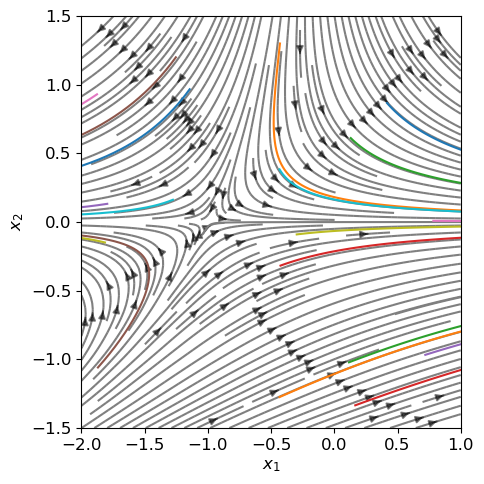

In [31]:
dt = 1e-2

ut = lambda x : 0

def f(t,x,u):
    x1,x2 = x
    dx = np.array([x1 + np.exp(-x2), -x2])
    return dx

plt.figure(figsize=(5,5))

# simulation time
t = 10

# phase portrait / "quiver" plot
ax = plt.subplot(1,1,1)
X, Y = np.meshgrid(np.linspace(-2,+1, 11), np.linspace(-1.5, +1.5, 11))
dX,dY = np.asarray([f(0.,(x,y),0.).flatten() for x,y in zip(X.flatten(),Y.flatten())]).T
dX,dY = dX.reshape(X.shape),dY.reshape(Y.shape)
ax.streamplot(X,Y,dX,dY,density=2.,color=(0,0,0,.5))
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

for _ in range(20):
  x0 = 3*np.random.rand(2) + [-2,-1.5]
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=ut)
  ax.plot(x_[:,0],x_[:,1])

ax.set_xlim((-2,+1))
ax.set_ylim((-1.5,+1.5))

plt.tight_layout()

## subproblem 6b

Find the (only) equilibrium for the system $x_e$ and linearize about that equilibrium to obtain matrix $A$ such that $\dot{x} \simeq A x$ for $x$ near $x_e$.

### solution

Solving $\dot{x}_2 = 0$ yields equilibrium value $x_{e,2} = 0$. Plugging that into $\dot{x}_1$ yields equilibrium condition $x_1 + e^0 = 0$, so the equilibrium value is $x_{e,1} = -1$. The equilibrium $x_e = (-1,0)$.

Letting $f(x) = (\dot{x}_1,\dot{x}_2)$, we have the following derivatives:
$$ \partial_1 f_1 = 1,\ \partial_2 f_1 = -e^{x_2},\ \partial_1 f_2 = 0,\ \partial_2 f_2 = -1. $$

Evaluating these derivatives at $x_e$ and tabulating into a matrix yields
$$ A = \left[ \begin{array}{cc} 1 & -1 \\ 0 & -1 \end{array} \right]. $$

As a final sanity check, we compare with the result of a numerical approximation algorithm. 

In [32]:
x_e = np.array([-1,0])
Jacobian(lambda x : f(0,x,0),x_e,1e-3)

array([[ 1., -1.],
       [ 0., -1.]])